In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_343.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_739.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_182.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_661.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_199.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_20.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_288.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_83.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_842.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_612.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_284.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_305.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_829.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_393.jpg
/kaggle/input/brain-tumors-256x256/Data/pituitary_tumor/P_98.jpg
/kaggle/input

In [2]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D,Dropout
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Dataset

In [3]:
dataset_dir='/kaggle/input/brain-tumors-256x256/Data'
image_data=[]
labels=[]
for class_name in os.listdir(dataset_dir):
    class_dir=os.path.join(dataset_dir,class_name)
    for image_file in os.listdir(class_dir):
        image_path=os.path.join(class_dir,image_file)
        image=cv2.imread(image_path)
        image_data.append(image)
        labels.append(class_name)

# Take a view of an image

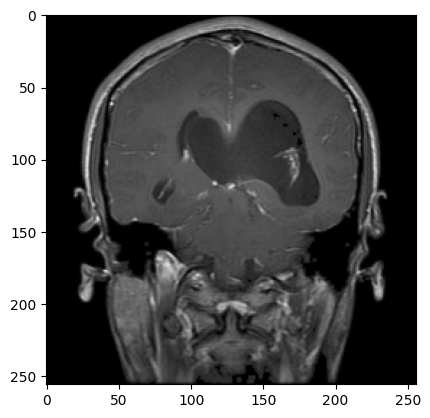

In [4]:
plt.imshow(image_data[2345])

<Axes: ylabel='count'>

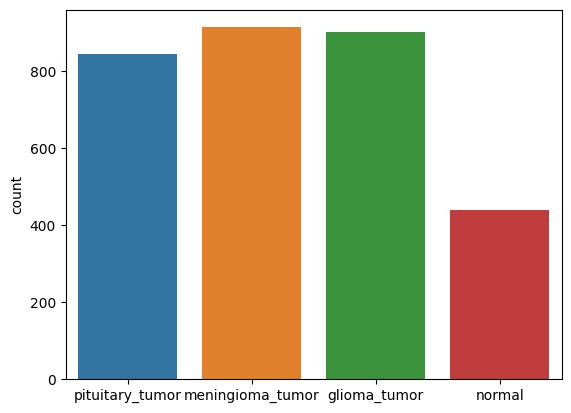

In [5]:
import seaborn as sns
sns.countplot(x=labels)

# Preprocess the images

In [6]:
target_size=(128,128)
for i in range(len(image_data)):
    image_data[i]=cv2.resize(image_data[i],target_size)

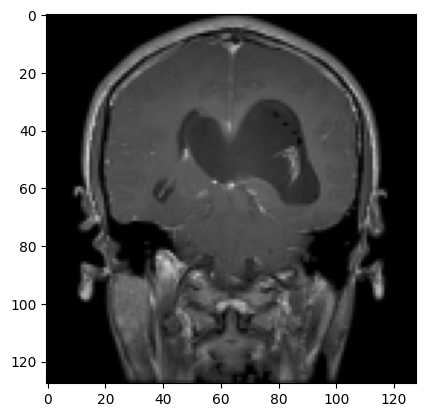

In [7]:
plt.imshow(image_data[2345])

In [8]:
for i, value in enumerate(labels):
    if value == 'glioma_tumor':
        labels[i] = 0
    elif value == 'meningioma_tumor':
        labels[i] = 1
    elif value == 'normal':
        labels[i] = 2
    else:
        labels[i] = 3

# Convert Data to Numpy arrays

In [9]:
image_data=np.array(image_data)
labels=np.array(labels)

# Shuffling the data

In [10]:
from sklearn.utils import shuffle
image_data,labels=shuffle(image_data,labels)

# splitting the dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(image_data,labels,test_size=0.3,random_state=42)
X_test,X_val,y_test,y_val=train_test_split(X_temp,y_temp,test_size=0.2,random_state=42)

# Normalize pixel values to be between 0 and 1.

In [12]:
X_train,X_test,X_val=X_train/256.0,X_test/256.0,X_val/256.0

# Creating Model

In [13]:
from keras.regularizers import l2
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(128,activation='relu'),
    Dropout(0.25),
    
    layers.Dense(128,activation='relu'),
    Dropout(0.25),
    
    layers.Dense(64,activation='relu'),
    Dropout(0.25),
    
    layers.Dense(4,activation='softmax')
])

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
68/68 [==============================] - 13s 26ms/step - loss: 1.3567 - accuracy: 0.3281 - val_loss: 1.1971 - val_accuracy: 0.4032
Epoch 2/10
68/68 [==============================] - 1s 16ms/step - loss: 1.0623 - accuracy: 0.5261 - val_loss: 0.9325 - val_accuracy: 0.5914
Epoch 3/10
68/68 [==============================] - 1s 16ms/step - loss: 0.8579 - accuracy: 0.6470 - val_loss: 0.7645 - val_accuracy: 0.6559
Epoch 4/10
68/68 [==============================] - 1s 16ms/step - loss: 0.6222 - accuracy: 0.7508 - val_loss: 0.6961 - val_accuracy: 0.7151
Epoch 5/10
68/68 [==============================] - 1s 16ms/step - loss: 0.4465 - accuracy: 0.8251 - val_loss: 0.5743 - val_accuracy: 0.7742
Epoch 6/10
68/68 [==============================] - 1s 16ms/step - loss: 0.3160 - accuracy: 0.8823 - val_loss: 0.5009 - val_accuracy: 0.8065
Epoch 7/10
68/68 [==============================] - 1s 16ms/step - loss: 0.2440 - accuracy: 0.9137 - val_loss: 0.5566 - val_accuracy: 0.8226
Epoch 8/10
6

In [16]:
model_pred=model.predict(X_test)

24/24 [==============================] - 0s 8ms/step


In [17]:
label_pred= np.argmax(model_pred, axis=1)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,label_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       191
           1       0.88      0.76      0.81       242
           2       0.74      0.95      0.83        96
           3       0.90      0.92      0.91       214

    accuracy                           0.85       743
   macro avg       0.83      0.86      0.84       743
weighted avg       0.85      0.85      0.85       743



In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, label_pred))

[[158  15  12   6]
 [ 29 183  16  14]
 [  0   4  91   1]
 [  6   7   4 197]]


# CNN with Keras tuner

In [20]:
import keras
from keras_tuner.tuners import RandomSearch

In [21]:
def build_model(hp):
    model_hp=keras.Sequential()
    model_hp.add(layers.Conv2D(filters=hp.Int('conv_1_units',min_value=32,max_value=128,step=16),
                            kernel_size=hp.Int('conv_1_kernel',min_value=3,max_value=5),
                            activation='relu',input_shape=(128,128,3)))
    model_hp.add(layers.MaxPooling2D(pool_size=(2,2)))
    model_hp.add(layers.Flatten())
    model_hp.add(layers.Dense(units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),activation='relu'))
    model_hp.add(layers.Dense(4,activation='softmax'))
    model_hp.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model_hp

In [22]:
tuner=RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project'
)

In [23]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Trial 10 Complete [00h 00m 22s]
val_accuracy: 0.6774193644523621

Best val_accuracy So Far: 0.8387096524238586
Total elapsed time: 00h 04m 49s


In [24]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_model=tuner.hypermodel.build(best_hps)

In [25]:
best_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
68/68 [==============================] - 3s 37ms/step - loss: 2.3024 - accuracy: 0.3641 - val_loss: 1.1400 - val_accuracy: 0.4785
Epoch 2/10
68/68 [==============================] - 2s 34ms/step - loss: 0.8569 - accuracy: 0.6562 - val_loss: 0.6805 - val_accuracy: 0.7258
Epoch 3/10
68/68 [==============================] - 2s 34ms/step - loss: 0.3412 - accuracy: 0.8800 - val_loss: 0.7350 - val_accuracy: 0.7312
Epoch 4/10
68/68 [==============================] - 2s 34ms/step - loss: 0.1160 - accuracy: 0.9723 - val_loss: 0.6716 - val_accuracy: 0.8011
Epoch 5/10
68/68 [==============================] - 2s 33ms/step - loss: 0.0374 - accuracy: 0.9963 - val_loss: 0.5885 - val_accuracy: 0.8226
Epoch 6/10
68/68 [==============================] - 2s 33ms/step - loss: 0.0123 - accuracy: 0.9986 - val_loss: 0.6753 - val_accuracy: 0.8226
Epoch 7/10
68/68 [==============================] - 2s 34ms/step - loss: 0.0126 - accuracy: 0.9995 - val_loss: 0.7088 - val_accuracy: 0.8172
Epoch 8/10
68

In [26]:
best_model_pred=best_model.predict(X_test)

24/24 [==============================] - 0s 9ms/step


In [27]:
best_model_pred= np.argmax(best_model_pred, axis=1)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_model_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       191
           1       0.90      0.68      0.78       242
           2       0.78      0.81      0.80        96
           3       0.88      0.91      0.89       214

    accuracy                           0.82       743
   macro avg       0.82      0.82      0.81       743
weighted avg       0.83      0.82      0.82       743



In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, best_model_pred))

[[170  10   5   6]
 [ 46 165  15  16]
 [ 10   3  78   5]
 [ 13   5   2 194]]


# Tuning model with dropout 

In [30]:
def build_model2(hp):
    model_hpdp = keras.Sequential()
    model_hpdp.add(layers.Conv2D(filters=hp.Int('conv_1_units', min_value=32, max_value=128, step=16),
                              kernel_size=hp.Int('conv_1_kernel', min_value=3, max_value=5),
                              activation='relu', input_shape=(128, 128, 3)))
    model_hpdp.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model_hpdp.add(layers.Flatten())
    
    # Add a dropout layer with a probability you can tune using Hyperparameters
    model_hpdp.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    
    model_hpdp.add(layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16), activation='relu'))
    model_hpdp.add(layers.Dense(4, activation='softmax'))
    
    model_hpdp.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
    
    return model_hpdp

In [31]:
tuner2=RandomSearch(
    build_model2,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir2',
    project_name='my_project2'
)

In [32]:
tuner2.search(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Trial 10 Complete [00h 00m 22s]
val_accuracy: 0.8172042965888977

Best val_accuracy So Far: 0.8494623899459839
Total elapsed time: 00h 03m 04s


In [33]:
best_hps2=tuner2.get_best_hyperparameters(num_trials=1)[0]
best_model2=tuner2.hypermodel.build(best_hps2)

In [34]:
best_model2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
68/68 [==============================] - 3s 36ms/step - loss: 1.8138 - accuracy: 0.4236 - val_loss: 1.0385 - val_accuracy: 0.5591
Epoch 2/10
68/68 [==============================] - 2s 33ms/step - loss: 0.6909 - accuracy: 0.7397 - val_loss: 0.6189 - val_accuracy: 0.7634
Epoch 3/10
68/68 [==============================] - 2s 33ms/step - loss: 0.2898 - accuracy: 0.8966 - val_loss: 0.5552 - val_accuracy: 0.7796
Epoch 4/10
68/68 [==============================] - 2s 33ms/step - loss: 0.1024 - accuracy: 0.9742 - val_loss: 0.6286 - val_accuracy: 0.7957
Epoch 5/10
68/68 [==============================] - 2s 34ms/step - loss: 0.0377 - accuracy: 0.9949 - val_loss: 0.8339 - val_accuracy: 0.7903
Epoch 6/10
68/68 [==============================] - 2s 34ms/step - loss: 0.0197 - accuracy: 0.9968 - val_loss: 0.5120 - val_accuracy: 0.8280
Epoch 7/10
68/68 [==============================] - 2s 33ms/step - loss: 0.0149 - accuracy: 0.9986 - val_loss: 0.7325 - val_accuracy: 0.8226
Epoch 8/10
68

In [35]:
best_model2_pred=best_model2.predict(X_test)

24/24 [==============================] - 0s 9ms/step


In [36]:
best_model2_pred= np.argmax(best_model2_pred, axis=1)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_model2_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       191
           1       0.84      0.74      0.79       242
           2       0.84      0.84      0.84        96
           3       0.86      0.93      0.89       214

    accuracy                           0.83       743
   macro avg       0.83      0.84      0.84       743
weighted avg       0.83      0.83      0.83       743



In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, best_model2_pred))

[[161  18   4   8]
 [ 30 180  11  21]
 [  4   9  81   2]
 [  9   7   0 198]]
